<a href="https://colab.research.google.com/github/ahorvath008/Data-Science/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Purpose: ** To perform analytics on Covid-19 data

** Data: ** The data used from a dedicated Covid-19 API.  (Corona-API.com)

Table of Contents

Data import and data wrangling
Data characteristics
Exploratory Data Analysis (EDA)
Data visualisations and graphs


In [21]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns
import scipy as stats
import json
import flask

In [2]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [3]:
! pip install folium==0.5.0
import folium # plotting library

     |████████████████████████████████| 81kB 5.3MB/s 
  Created wheel for folium: filename=folium-0.5.0-cp36-none-any.whl size=76240 sha256=6c59b5a6afb68a86816418b9039d2d89132fae8e8ad211817a03d1f049bef073
  Stored in directory: /root/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.5.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [4]:
# Establish a connection to the Coronavirus API
url = 'https://corona-api.com/countries?format=json'

In [5]:
# Grab the data from the file in json format
results = requests.get(url).json()
results

{'_cacheHit': True,
 'data': [{'code': 'AF',
   'coordinates': {'latitude': 33, 'longitude': 65},
   'latest_data': {'calculated': {'cases_per_million_population': 807,
     'death_rate': 4.349419894059642,
     'recovered_vs_death_ratio': None,
     'recovery_rate': 85.98398064480654},
    'confirmed': 54559,
    'critical': 5274,
    'deaths': 2373,
    'recovered': 46912},
   'name': 'Afghanistan',
   'population': 29121286,
   'today': {'confirmed': 76, 'deaths': 3},
   'updated_at': '2021-01-22T16:05:10.479Z'},
  {'code': 'AL',
   'coordinates': {'latitude': 41, 'longitude': 20},
   'latest_data': {'calculated': {'cases_per_million_population': 39,
     'death_rate': 1.8441723869506759,
     'recovered_vs_death_ratio': None,
     'recovery_rate': 60.71049465713679},
    'confirmed': 70655,
    'critical': 26457,
    'deaths': 1303,
    'recovered': 42895},
   'name': 'Albania',
   'population': 2986952,
   'today': {'confirmed': 739, 'deaths': 7},
   'updated_at': '2021-01-22T16:0

In [6]:
# assign relevant part of JSON to countries
data = results['data']

# tranform venues into a dataframe
df = json_normalize(data)
df.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,code,population,updated_at,coordinates.latitude,coordinates.longitude,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population
0,Afghanistan,AF,29121286.0,2021-01-22T16:05:10.479Z,33.0,65.0,3,76,2373,54559,46912,5274,4.349420,85.983981,None,807
1,Albania,AL,2986952.0,2021-01-22T16:05:10.479Z,41.0,20.0,7,739,1303,70655,42895,26457,1.844172,60.710495,None,39
2,Åland Islands,AX,26711.0,2021-01-22T16:05:10.479Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
3,American Samoa,AS,57881.0,2021-01-22T16:05:10.479Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
4,Algeria,DZ,34586184.0,2021-01-22T16:05:10.479Z,28.0,3.0,0,0,2853,104852,71343,30656,2.720978,68.041621,None,42


In [7]:
#Rename some of the headers to make the file more readable
df.rename(columns={'latest_data.deaths':'total_death'}, inplace=True)
df.rename(columns={'latest_data.confirmed':'total_cases'}, inplace=True)
df.rename(columns={'name':'country'}, inplace=True)
df.rename(columns={'latest_data.calculated.death_rate':'deathrate'}, inplace=True)
df.rename(columns={'latest_data.calculated.recovery_rate':'recoveryrate'}, inplace=True)
df.rename(columns={'latest_data.recovered':'total_recovered'}, inplace=True)
df.rename(columns={'calculated.cases_per_million_population':'cases_per_million'}, inplace=True)
df.head(5)

,country,code,population,updated_at,coordinates.latitude,coordinates.longitude,today.deaths,today.confirmed,total_death,total_cases,total_recovered,latest_data.critical,deathrate,recoveryrate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population
0,Afghanistan,AF,29121286.0,2021-01-22T16:05:10.479Z,33.0,65.0,3,76,2373,54559,46912,5274,4.349420,85.983981,None,807
1,Albania,AL,2986952.0,2021-01-22T16:05:10.479Z,41.0,20.0,7,739,1303,70655,42895,26457,1.844172,60.710495,None,39
2,Åland Islands,AX,26711.0,2021-01-22T16:05:10.479Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
3,American Samoa,AS,57881.0,2021-01-22T16:05:10.479Z,0.0,0.0,0,0,0,0,0,0,NaN,NaN,None,0
4,Algeria,DZ,34586184.0,2021-01-22T16:05:10.479Z,28.0,3.0,0,0,2853,104852,71343,30656,2.720978,68.041621,None,42


In [8]:
#Drop columns that are not required for analytics (coordinates)
df.drop(['coordinates.latitude', 'coordinates.longitude', 'code'], axis=1, inplace=True)
df.head(5)

,country,population,updated_at,today.deaths,today.confirmed,total_death,total_cases,total_recovered,latest_data.critical,deathrate,recoveryrate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population
0,Afghanistan,29121286.0,2021-01-22T16:05:10.479Z,3,76,2373,54559,46912,5274,4.349420,85.983981,None,807
1,Albania,2986952.0,2021-01-22T16:05:10.479Z,7,739,1303,70655,42895,26457,1.844172,60.710495,None,39
2,Åland Islands,26711.0,2021-01-22T16:05:10.479Z,0,0,0,0,0,0,NaN,NaN,None,0
3,American Samoa,57881.0,2021-01-22T16:05:10.479Z,0,0,0,0,0,0,NaN,NaN,None,0
4,Algeria,34586184.0,2021-01-22T16:05:10.479Z,0,0,2853,104852,71343,30656,2.720978,68.041621,None,42


In [18]:
#Calculate total recovery rate
df["Recovery_rate"] = df["total_recovered"] / df["total_cases"]
df.head(5)

,country,population,updated_at,today.deaths,today.confirmed,total_death,total_cases,total_recovered,latest_data.critical,deathrate,recoveryrate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population,Recovery_rate
0,Afghanistan,29121286.0,2021-01-22T16:05:10.479Z,3,76,2373,54559,46912,5274,4.349420,85.983981,None,807,0.859840
1,Albania,2986952.0,2021-01-22T16:05:10.479Z,7,739,1303,70655,42895,26457,1.844172,60.710495,None,39,0.607105
2,Åland Islands,26711.0,2021-01-22T16:05:10.479Z,0,0,0,0,0,0,NaN,NaN,None,0,NaN
3,American Samoa,57881.0,2021-01-22T16:05:10.479Z,0,0,0,0,0,0,NaN,NaN,None,0,NaN
4,Algeria,34586184.0,2021-01-22T16:05:10.479Z,0,0,2853,104852,71343,30656,2.720978,68.041621,None,42,0.680416


In [28]:
#Top 10 countries with cases (total cases)
df_high = df.sort_values(by="total_cases", ascending=False)
df_high_top = df_high.head(10)

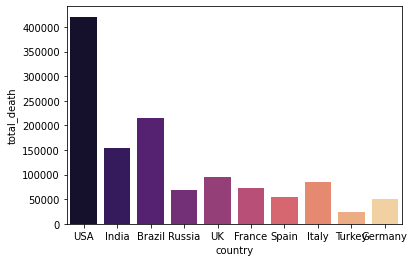

In [29]:
# Graph
sns.barplot(data=df_high_top, x='country', y='total_death', palette='magma')

In [32]:
#Top 10 countries with cases (total per population)
df_million = df.sort_values(by="latest_data.calculated.cases_per_million_population", ascending=False)
df_million = df_million.head(10)


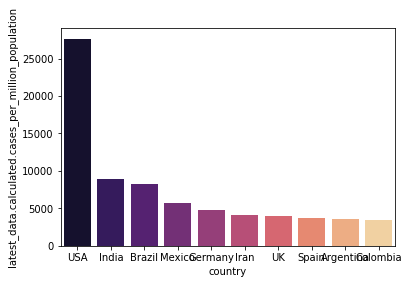

In [33]:
#Top 10 countries with cases (total cases per one million)
sns.barplot(data=df_million, x='country', y='latest_data.calculated.cases_per_million_population', palette='magma')

In [36]:
#Lowest recovery rates
df_lowest = df.sort_values(by='Recovery_rate', ascending=False)
df_lowest = df_lowest.head(10)

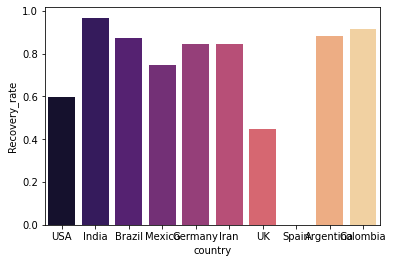

In [37]:
#Top 10 countries with lowest recovery ates 
sns.barplot(data=df_million, x='country', y='Recovery_rate', palette='magma')